# Python for Meteorology, Oceanography, and Climate

## Practical Example #2

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv('dataset/weatherHistory.csv.gz')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [46]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

It's immediately apparent that the `Precip Type` column contains 517 missing values. 
Fortunately, this column isn't relevant to our analysis, so we can remove it later. 
Now, let's examine the total number of rows and the data types of each column.

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [48]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

We'll now focus on the columns essential for our analysis, excluding the rest. The columns we'll keep are:

* 'Formatted Date'
* 'Apparent Temperature (C)'
* 'Humidity'

In [49]:
col = ['Formatted Date', 'Apparent Temperature (C)', 'Humidity']
data = data[col]
data.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


To proceed with our analysis, we need to convert the 'Formatted Date' column to a proper date-time format. 
Currently, it's treated as an 'object', which isn't suitable for our model. 
We can easily achieve this using Pandas' built-in function, `pd.to_datetime()`.

Don't forget to set `utc=True` when doing so.

In [50]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data = data.set_index('Formatted Date')
data = data.resample('ME').mean()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2005-12-31 00:00:00+00:00 to 2016-12-31 00:00:00+00:00
Freq: ME
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Apparent Temperature (C)  133 non-null    float64
 1   Humidity                  133 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


In [52]:
data.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


Let's begin by examining how 'Apparent Temperature' and 'Humidity' change over time.

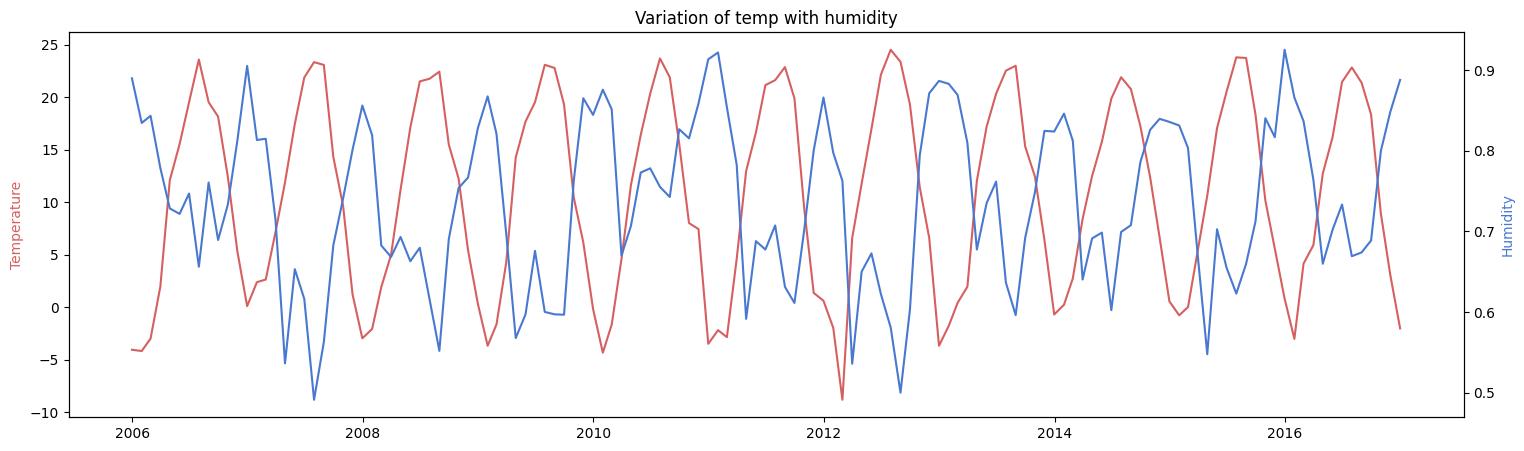

In [53]:
fig, ax1 = plt.subplots(figsize=(18,5))

ax2 = ax1.twinx()
ax1.plot(data['Apparent Temperature (C)'], 'r-')
ax2.plot(data['Humidity'], 'b-')

plt.title('Variation of temp with humidity')

ax1.set_ylabel('Temperature', color='r')
ax2.set_ylabel('Humidity', color='b')

plt.show()

Next, we'll visualize the relationship between temperature and humidity, focusing on data from every other month.

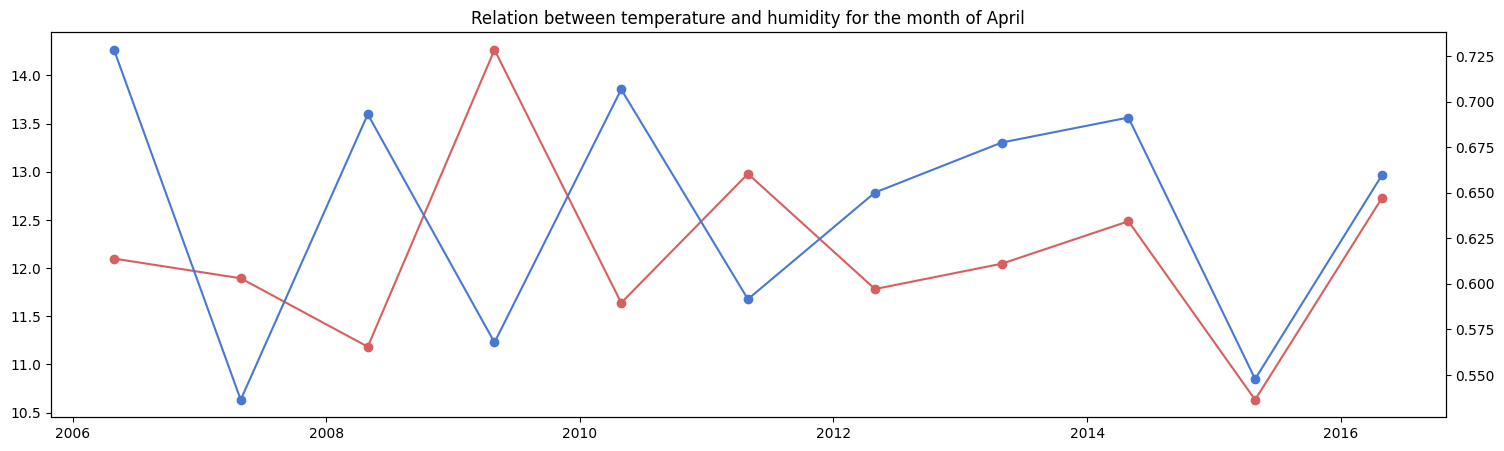

In [54]:
fig, ax1 = plt.subplots(figsize=(18,5))

data_of_april = data[data.index.month==4]

ax2 = ax1.twinx()
ax1.plot(data_of_april['Apparent Temperature (C)'], '-ro')
ax2.plot(data_of_april['Humidity'], '-bo')

plt.title('Relation between temperature and humidity for the month of April')
plt.show()

The graph reveals a sharp temperature spike in April 2009, marking the highest temperature recorded for that month. Following 2009, temperatures trended downward, reaching their lowest point in April 2015.

Let's explore the relationships between the different features in our dataset by visualizing their correlations. This might reveal some interesting insights.

<Axes: >

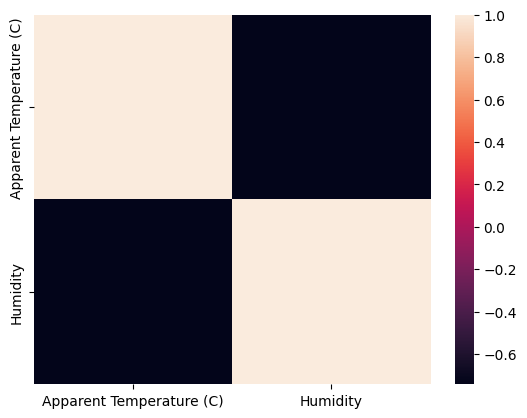

In [55]:
correlation = data.corr()
sns.heatmap(correlation)

To better understand how humidity affects apparent temperature, let's create a bar chart visualizing their relationship.

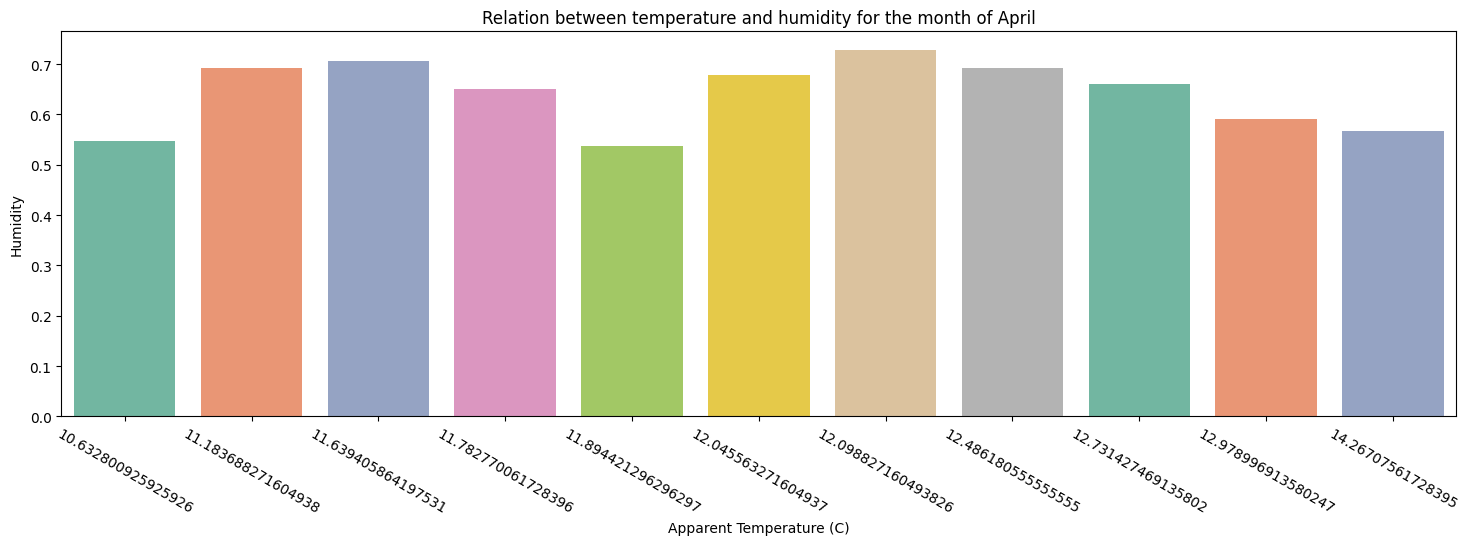

In [56]:
plt.figure(figsize = (18,5))
sns.barplot(x='Apparent Temperature (C)', y='Humidity', data=data_of_april, hue='Apparent Temperature (C)', palette='Set2')
plt.legend([],[], frameon=False)
plt.xticks(rotation=-30)
plt.title('Relation between temperature and humidity for the month of April')
plt.show()

Global warming significantly impacts our environment. Our analysis highlights notable temperature fluctuations over the past decade, with both sharp increases and decreases. However, humidity levels have remained relatively stable during the same period, showing neither a consistent rise nor fall.